In [3]:
!pip install scikit-fuzzy

  Obtaining dependency information for scikit-fuzzy from https://files.pythonhosted.org/packages/9d/06/da70811f95c4a3bada55e7b20c957548a4d9bc21150916f0c024286d67c7/scikit_fuzzy-0.5.0-py2.py3-none-any.whl.metadata
   ---------------------------------------- 0.0/920.8 kB ? eta -:--:--
   ---------------------------------------- 0.0/920.8 kB ? eta -:--:--
   ---------------------------------------- 0.0/920.8 kB ? eta -:--:--
   ---------------------------------------- 0.0/920.8 kB ? eta -:--:--
   ---------------------------------------- 0.0/920.8 kB ? eta -:--:--
   ---------------------------------------- 0.0/920.8 kB ? eta -:--:--
   - -------------------------------------- 41.0/920.8 kB 1.9 MB/s eta 0:00:01
   - -------------------------------------- 41.0/920.8 kB 1.9 MB/s eta 0:00:01
   - -------------------------------------- 41.0/920.8 kB 1.9 MB/s eta 0:00:01
   - -------------------------------------- 41.0/920.8 kB 1.9 MB/s eta 0:00:01
   - -------------------------------------- 4


[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [16]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Define fuzzy variables
service_speed = ctrl.Antecedent(np.arange(0, 11, 1), 'service_speed')
food_quality = ctrl.Antecedent(np.arange(0, 11, 1), 'food_quality')
ambiance = ctrl.Antecedent(np.arange(0, 11, 1), 'ambiance')
happiness = ctrl.Consequent(np.arange(0, 11, 1), 'happiness')

# Membership functions for inputs
service_speed['slow'] = fuzz.trimf(service_speed.universe, [0, 0, 5])
service_speed['medium'] = fuzz.trimf(service_speed.universe, [0, 5, 10])
service_speed['fast'] = fuzz.trimf(service_speed.universe, [5, 10, 10])

food_quality['poor'] = fuzz.trimf(food_quality.universe, [0, 0, 5])
food_quality['average'] = fuzz.trimf(food_quality.universe, [0, 5, 10])
food_quality['good'] = fuzz.trimf(food_quality.universe, [5, 10, 10])

ambiance['unpleasant'] = fuzz.trimf(ambiance.universe, [0, 0, 5])
ambiance['neutral'] = fuzz.trimf(ambiance.universe, [0, 5, 10])
ambiance['pleasant'] = fuzz.trimf(ambiance.universe, [5, 10, 10])

# Membership functions for output
happiness['unhappy'] = fuzz.trimf(happiness.universe, [0, 0, 5])
happiness['satisfied'] = fuzz.trimf(happiness.universe, [0, 5, 10])
happiness['very_happy'] = fuzz.trimf(happiness.universe, [5, 10, 10])

# Define rules
rule1 = ctrl.Rule(service_speed['slow'] & food_quality['poor'] & ambiance['unpleasant'], happiness['unhappy'])
rule2 = ctrl.Rule(service_speed['fast'] & food_quality['good'] & ambiance['pleasant'], happiness['very_happy'])
rule3 = ctrl.Rule(service_speed['medium'] & food_quality['average'] & ambiance['neutral'], happiness['satisfied'])

# Control system
happiness_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
happiness_simulation = ctrl.ControlSystemSimulation(happiness_ctrl)

# Input values
happiness_simulation.input['service_speed'] = 7
happiness_simulation.input['food_quality'] = 8
happiness_simulation.input['ambiance'] = 9

# Compute result
happiness_simulation.compute()
print(f"Customer Happiness Level: {happiness_simulation.output['happiness']:.2f}")




Customer Happiness Level: 6.05


Input Example
Kecepatan pelayanan : 7 
Kualitas makanan : 8 
Suasana : 9 
Nilai kebahagiaan pelanggan: 6.05
Kesimpulan: Sangat bahagia

Aturan 1: Jika kecepatan pelayanan lambat dan kualitas makanan buruk dan suasana tidak menyenangkan, maka kebahagiaan pelanggan tidak bahagia.
Aturan 2: Jika kecepatan pelayanan cepat dan kualitas makanan baik dan suasana menyenangkan, maka kebahagiaan pelanggan sangat bahagia.
Aturan 3: Jika kecepatan pelayanan sedang dan kualitas makanan rata-rata dan suasana netral, maka kebahagiaan pelanggan puas.
Aturan 4: Jika kecepatan pelayanan lambat dan kualitas makanan rata-rata dan suasana netral, maka kebahagiaan pelanggan tidak bahagia.
Aturan 5: Jika kecepatan pelayanan cepat dan kualitas makanan rata-rata dan suasana menyenangkan, maka kebahagiaan pelanggan puas.
Aturan 6: Jika kecepatan pelayanan sedang dan kualitas makanan baik dan suasana menyenangkan, maka kebahagiaan pelanggan sangat bahagia.
Aturan 7: Jika kecepatan pelayanan cepat dan kualitas ma

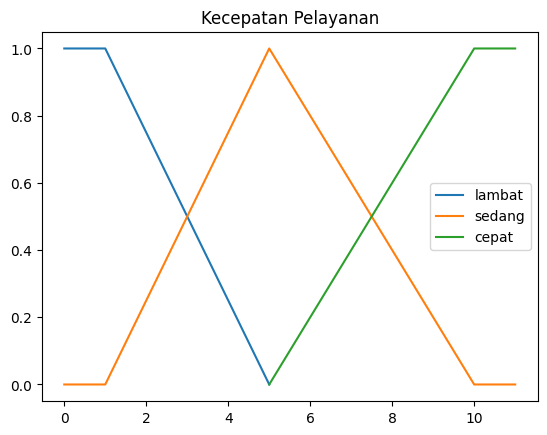

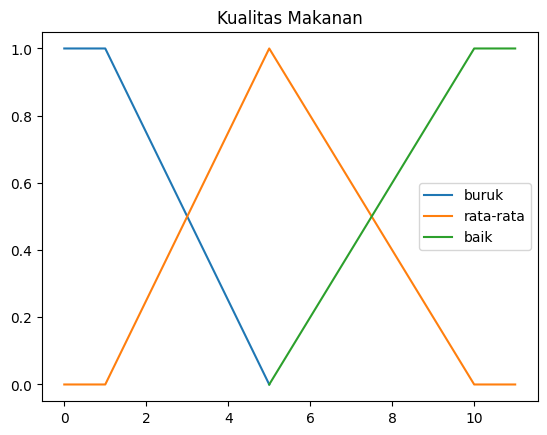

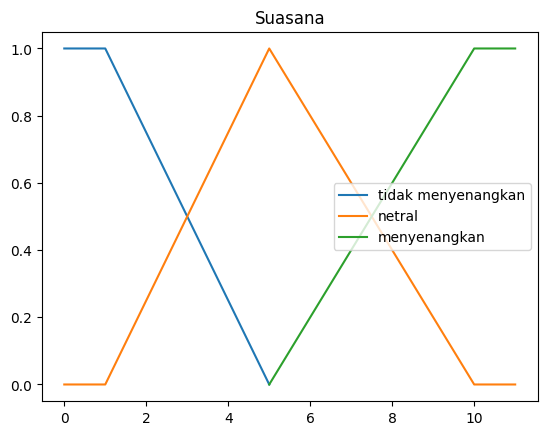

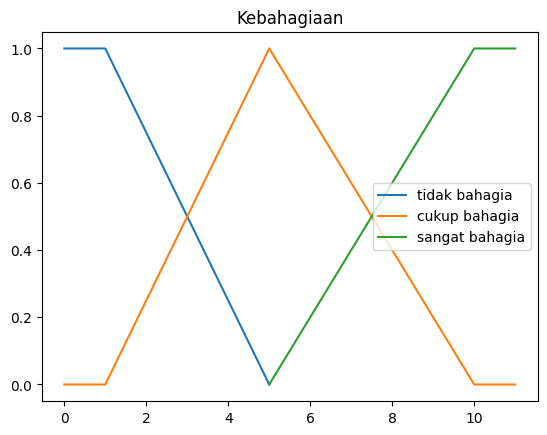

In [61]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# Define fuzzy variables
service_speed = ctrl.Antecedent(np.arange(0, 11, 1), 'service_speed')
food_quality = ctrl.Antecedent(np.arange(0, 11, 1), 'food_quality')
ambiance = ctrl.Antecedent(np.arange(0, 11, 1), 'ambiance')
happiness = ctrl.Consequent(np.arange(0, 11, 1), 'happiness')

# Membership functions for inputs
service_speed['slow'] = fuzz.trimf(service_speed.universe, [0, 0, 5])
service_speed['medium'] = fuzz.trimf(service_speed.universe, [0, 5, 10])
service_speed['fast'] = fuzz.trimf(service_speed.universe, [5, 10, 10])

food_quality['poor'] = fuzz.trimf(food_quality.universe, [0, 0, 5])
food_quality['average'] = fuzz.trimf(food_quality.universe, [0, 5, 10])
food_quality['good'] = fuzz.trimf(food_quality.universe, [5, 10, 10])

ambiance['unpleasant'] = fuzz.trimf(ambiance.universe, [0, 0, 5])
ambiance['neutral'] = fuzz.trimf(ambiance.universe, [0, 5, 10])
ambiance['pleasant'] = fuzz.trimf(ambiance.universe, [5, 10, 10])

# Membership functions for output
happiness['unhappy'] = fuzz.trimf(happiness.universe, [0, 0, 5])
happiness['satisfied'] = fuzz.trimf(happiness.universe, [0, 5, 10])
happiness['very_happy'] = fuzz.trimf(happiness.universe, [5, 10, 10])

# Define rules
rule1 = ctrl.Rule(service_speed['slow'] & food_quality['poor'] & ambiance['unpleasant'], happiness['unhappy'])
rule2 = ctrl.Rule(service_speed['fast'] & food_quality['good'] & ambiance['pleasant'], happiness['very_happy'])
rule3 = ctrl.Rule(service_speed['medium'] & food_quality['average'] & ambiance['neutral'], happiness['satisfied'])
rule4 = ctrl.Rule(service_speed['slow'] & food_quality['average'] & ambiance['neutral'], happiness['unhappy'])
rule5 = ctrl.Rule(service_speed['fast'] & food_quality['average'] & ambiance['pleasant'], happiness['satisfied'])
rule6 = ctrl.Rule(service_speed['medium'] & food_quality['good'] & ambiance['pleasant'], happiness['very_happy'])
rule7 = ctrl.Rule(service_speed['fast'] & food_quality['poor'] & ambiance['neutral'], happiness['satisfied'])
rule8 = ctrl.Rule(service_speed['medium'] & food_quality['poor'] & ambiance['unpleasant'], happiness['unhappy'])

# Control system
happiness_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
happiness_simulation = ctrl.ControlSystemSimulation(happiness_ctrl)

# Input values
a=7
b=8
c=9
happiness_simulation.input['service_speed'] = a
happiness_simulation.input['food_quality'] = b
happiness_simulation.input['ambiance'] = c

# Compute result
happiness_simulation.compute()

happiness_value = happiness_simulation.output['happiness']

if happiness_value <= 3:
    happiness_level = "Tidak bahagia"
elif 3 < happiness_value <= 6:
    happiness_level = "Cukup bahagia"
else:
    happiness_level = "Sangat bahagia"

print("Input Example")
print(f"Kecepatan pelayanan : {a} ")
print(f"Kualitas makanan : {b} ")
print(f"Suasana : {c} ")
print(f"Nilai kebahagiaan pelanggan: {happiness_simulation.output['happiness']:.2f}")
print(f"Kesimpulan: {happiness_level}\n")

rules = [
    "Jika kecepatan pelayanan lambat dan kualitas makanan buruk dan suasana tidak menyenangkan, maka kebahagiaan pelanggan tidak bahagia.",
    "Jika kecepatan pelayanan cepat dan kualitas makanan baik dan suasana menyenangkan, maka kebahagiaan pelanggan sangat bahagia.",
    "Jika kecepatan pelayanan sedang dan kualitas makanan rata-rata dan suasana netral, maka kebahagiaan pelanggan puas.",
    "Jika kecepatan pelayanan lambat dan kualitas makanan rata-rata dan suasana netral, maka kebahagiaan pelanggan tidak bahagia.",
    "Jika kecepatan pelayanan cepat dan kualitas makanan rata-rata dan suasana menyenangkan, maka kebahagiaan pelanggan puas.",
    "Jika kecepatan pelayanan sedang dan kualitas makanan baik dan suasana menyenangkan, maka kebahagiaan pelanggan sangat bahagia.",
    "Jika kecepatan pelayanan cepat dan kualitas makanan buruk dan suasana netral, maka kebahagiaan pelanggan puas.",
    "Jika kecepatan pelayanan sedang dan kualitas makanan buruk dan suasana tidak menyenangkan, maka kebahagiaan pelanggan tidak bahagia."
]

# Cetak semua aturan
for i, rule in enumerate(rules, 1):
    print(f"Aturan {i}: {rule}")


service_speed = {
    'slow': {0: 1, 1 : 1, 5: 0}, 
    'medium': {0 :0, 1:0 , 5: 1, 10: 0, 11:0}, 
    'fast': {5: 0, 10: 1, 10: 1, 11:1}
}
food_quality = {
    'poor': {0: 1, 1 : 1, 5: 0},
    'average': {0 :0, 1:0 , 5: 1, 10: 0, 11:0}, 
    'good': {5: 0, 10: 1, 10: 1, 11:1}
}
ambiance = {
    'unpleasant': {0: 1, 1 : 1, 5: 0},
    'neutral': {0 :0, 1:0 , 5: 1, 10: 0, 11:0}, 
    'pleasant': {5: 0, 10: 1, 10: 1, 11:1}
}

happiness = {
    'unhappy': {0: 1, 1 : 1, 5: 0}, # turun
    'satisfied': {0 :0, 1:0 , 5: 1, 10: 0, 11:0}, # naik
    'very_happy': {5: 0, 10: 1, 10: 1, 11:1}
}

import matplotlib.pyplot as plt
plt.plot(service_speed['slow'].keys(), service_speed['slow'].values(), label='lambat')
plt.plot(service_speed['medium'].keys(), service_speed['medium'].values(),label='sedang')
plt.plot(service_speed['fast'].keys(), service_speed['fast'].values(),label='cepat')
plt.title("Kecepatan Pelayanan")
plt.legend()
plt.show()


plt.plot(food_quality['poor'].keys(), food_quality['poor'].values(), label='buruk')
plt.plot(food_quality['average'].keys(), food_quality['average'].values(),label='rata-rata')
plt.plot(food_quality['good'].keys(), food_quality['good'].values(),label='baik')
plt.title("Kualitas Makanan")
plt.legend()
plt.show()


plt.plot(ambiance['unpleasant'].keys(), ambiance['unpleasant'].values(), label='tidak menyenangkan')
plt.plot(ambiance['neutral'].keys(), ambiance['neutral'].values(),label='netral')
plt.plot(ambiance['pleasant'].keys(), ambiance['pleasant'].values(),label='menyenangkan')
plt.title("Suasana")
plt.legend()
plt.show()

plt.plot(happiness['unhappy'].keys(), happiness['unhappy'].values(), label='tidak bahagia')
plt.plot(happiness['satisfied'].keys(), happiness['satisfied'].values(),label='cukup bahagia')
plt.plot(happiness['very_happy'].keys(), happiness['very_happy'].values(),label='sangat bahagia')
plt.title("Kebahagiaan")
plt.legend()
plt.show()






